In [1]:
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta #moving avg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
#load the data 
dltr_df = pd.read_csv('DLTR.csv')

In [5]:
dltr_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-03,56.549999,56.919998,56.389999,56.570000,56.570000,1694200
1,2014-01-06,56.740002,57.410000,56.549999,56.759998,56.759998,2780000
2,2014-01-07,56.549999,56.939999,56.480000,56.590000,56.590000,2398200
3,2014-01-08,56.470001,56.709999,56.330002,56.639999,56.639999,1914300
4,2014-01-09,55.919998,56.910000,55.639999,56.430000,56.430000,3417000


In [6]:
#Inspect it 
print(dltr_df)

            Date        Open        High         Low       Close   Adj Close  \
0     2014-01-03   56.549999   56.919998   56.389999   56.570000   56.570000   
1     2014-01-06   56.740002   57.410000   56.549999   56.759998   56.759998   
2     2014-01-07   56.549999   56.939999   56.480000   56.590000   56.590000   
3     2014-01-08   56.470001   56.709999   56.330002   56.639999   56.639999   
4     2014-01-09   55.919998   56.910000   55.639999   56.430000   56.430000   
...          ...         ...         ...         ...         ...         ...   
2170  2022-08-17  167.149994  169.789993  166.199997  168.179993  168.179993   
2171  2022-08-18  168.130005  168.899994  166.149994  168.050003  168.050003   
2172  2022-08-19  166.509995  168.740005  166.369995  167.679993  167.679993   
2173  2022-08-22  168.149994  168.490005  166.740005  167.419998  167.419998   
2174  2022-08-23  167.000000  168.770004  165.330002  166.110001  166.110001   

       Volume  
0     1694200  
1     2

In [7]:
#print the summary 
print(dltr_df.describe())

              Open         High          Low        Close    Adj Close  \
count  2175.000000  2175.000000  2175.000000  2175.000000  2175.000000   
mean     91.390565    92.477439    90.331044    91.422556    91.422556   
std      24.810342    25.209814    24.481571    24.876413    24.876413   
min      49.840000    50.200001    49.590000    49.680000    49.680000   
25%      77.225002    78.215000    76.325001    77.209999    77.209999   
50%      88.419998    89.540001    87.489998    88.400002    88.400002   
75%     101.660000   102.709999   100.385002   101.584999   101.584999   
max     175.119995   177.190002   172.649994   174.080002   174.080002   

             Volume  
count  2.175000e+03  
mean   2.690237e+06  
std    2.049119e+06  
min    5.599000e+05  
25%    1.681900e+06  
50%    2.194800e+06  
75%    3.056150e+06  
max    3.632090e+07  


In [8]:
# load data set 2
dltr_df2 = pd.read_csv('DLTR_2020_2022.csv')

In [10]:
dltr_df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-03,93.010002,93.580002,92.500000,93.029999,93.029999,2102600
1,2020-01-06,91.589996,93.059998,90.879997,93.029999,93.029999,3431600
2,2020-01-07,92.610001,93.389999,91.769997,91.930000,91.930000,2969000
3,2020-01-08,91.949997,91.949997,89.790001,89.790001,89.790001,5911500
4,2020-01-09,89.269997,91.160004,89.120003,91.059998,91.059998,4131400


In [11]:
#Inspect the 2020-2022
print(dltr_df2)

           Date        Open        High         Low       Close   Adj Close  \
0    2020-01-03   93.010002   93.580002   92.500000   93.029999   93.029999   
1    2020-01-06   91.589996   93.059998   90.879997   93.029999   93.029999   
2    2020-01-07   92.610001   93.389999   91.769997   91.930000   91.930000   
3    2020-01-08   91.949997   91.949997   89.790001   89.790001   89.790001   
4    2020-01-09   89.269997   91.160004   89.120003   91.059998   91.059998   
..          ...         ...         ...         ...         ...         ...   
663  2022-08-22  168.149994  168.490005  166.740005  167.419998  167.419998   
664  2022-08-23  167.000000  168.770004  165.330002  166.110001  166.110001   
665  2022-08-24  166.619995  166.960007  163.779999  165.979996  165.979996   
666  2022-08-25  149.029999  153.169998  144.309998  149.009995  149.009995   
667  2022-08-26  149.210007  149.479996  137.850006  138.699997  138.699997   

       Volume  
0     2102600  
1     3431600  
2  

In [12]:
#print the summary 
print(dltr_df2.describe())

             Open        High         Low       Close   Adj Close  \
count  668.000000  668.000000  668.000000  668.000000  668.000000   
mean   112.826946  114.442530  111.334611  112.910090  112.910090   
std     27.312112   27.654000   27.012526   27.401201   27.401201   
min     65.629997   71.389999   60.200001   65.570000   65.570000   
25%     92.697500   93.929998   91.767498   92.880001   92.880001   
50%    102.364998  103.884998  101.145001  102.654999  102.654999   
75%    134.535004  137.294994  132.610001  135.112507  135.112507   
max    175.119995  177.190002  172.649994  174.080002  174.080002   

             Volume  
count  6.680000e+02  
mean   2.644413e+06  
std    2.038534e+06  
min    6.518000e+05  
25%    1.640450e+06  
50%    2.074200e+06  
75%    2.983125e+06  
max    2.644140e+07  


In [13]:
#now prep the data for 2014-2019
dltr_df.set_index(pd.DatetimeIndex(dltr_df['Date']), inplace=True)

In [14]:
#now prep the data for 2020-2022
dltr_df2.set_index(pd.DatetimeIndex(dltr_df2['Date']), inplace=True)

In [15]:
#Keep the close for 2014-19
dltr_df = dltr_df[['Close']]

In [16]:
print(dltr_df)

                 Close
Date                  
2014-01-03   56.570000
2014-01-06   56.759998
2014-01-07   56.590000
2014-01-08   56.639999
2014-01-09   56.430000
...                ...
2022-08-17  168.179993
2022-08-18  168.050003
2022-08-19  167.679993
2022-08-22  167.419998
2022-08-23  166.110001

[2175 rows x 1 columns]


In [17]:
#Keep the close 2020-22
amzn_df2 = dltr_df2[['Close']]

In [18]:
print(dltr_df2)

                  Date        Open        High         Low       Close  \
Date                                                                     
2020-01-03  2020-01-03   93.010002   93.580002   92.500000   93.029999   
2020-01-06  2020-01-06   91.589996   93.059998   90.879997   93.029999   
2020-01-07  2020-01-07   92.610001   93.389999   91.769997   91.930000   
2020-01-08  2020-01-08   91.949997   91.949997   89.790001   89.790001   
2020-01-09  2020-01-09   89.269997   91.160004   89.120003   91.059998   
...                ...         ...         ...         ...         ...   
2022-08-22  2022-08-22  168.149994  168.490005  166.740005  167.419998   
2022-08-23  2022-08-23  167.000000  168.770004  165.330002  166.110001   
2022-08-24  2022-08-24  166.619995  166.960007  163.779999  165.979996   
2022-08-25  2022-08-25  149.029999  153.169998  144.309998  149.009995   
2022-08-26  2022-08-26  149.210007  149.479996  137.850006  138.699997   

             Adj Close    Volume  
Da

In [19]:
#Create a Variable to predict 2020-2022
prediction_days = 599

# Create an new column that targets the data and 
# predict values of x day away from the current price 
dltr_df['Actual Prediction'] = dltr_df[['Close']].shift(-prediction_days)


In [20]:
#print the new column for 2014-19
dltr_df

,Close,Actual Prediction
Date,,
2014-01-03,56.570000,76.889999
2014-01-06,56.759998,75.559998
2014-01-07,56.590000,77.529999
2014-01-08,56.639999,78.360001
2014-01-09,56.430000,88.370003
...,...,...
2022-08-17,168.179993,NaN
2022-08-18,168.050003,NaN
2022-08-19,167.679993,NaN


In [21]:
# Create independent dataset X and create a numpy array
X=X = np.array(dltr_df[['Close']])

In [22]:
#Git rid of any Nan/rows 
X=X[:-prediction_days]
#print(X)

In [23]:
#Creat the dependetnt data for Y
Y=dltr_df['Actual Prediction'].values


In [24]:
Y=Y[:-prediction_days]
# print(Y)

In [25]:
# train and test ratio is 70% traing and 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [26]:
#Creat the model
l_r = LinearRegression()
#train the model
l_r.fit(x_train, y_train)

LinearRegression()

In [27]:
#test the model using score
linear_score=l_r.score(x_test,y_test)
print(linear_score)

0.09766512458054621


In [28]:
#well I think that im going to predict the last 500days.
acutal_days=np.array(dltr_df[['Close']])[-prediction_days:]
# acutal_days

In [29]:
#print the liner regression prediction  for the next 52 days

linear_prediction=l_r.predict(acutal_days)

# linear_prediction


In [30]:
#okay this is were we put the 2020-2022 data in 
actual_20_22=np.array(dltr_df2[['Close']])
actual_20_22

array([[ 93.029999],
       [ 93.029999],
       [ 91.93    ],
       [ 89.790001],
       [ 91.059998],
       [ 91.349998],
       [ 90.769997],
       [ 90.57    ],
       [ 90.75    ],
       [ 91.080002],
       [ 91.550003],
       [ 89.5     ],
       [ 89.870003],
       [ 87.940002],
       [ 87.709999],
       [ 88.400002],
       [ 86.760002],
       [ 86.110001],
       [ 87.610001],
       [ 87.07    ],
       [ 87.510002],
       [ 88.309998],
       [ 88.709999],
       [ 87.940002],
       [ 87.139999],
       [ 87.18    ],
       [ 88.190002],
       [ 89.519997],
       [ 89.269997],
       [ 88.68    ],
       [ 91.080002],
       [ 91.989998],
       [ 93.220001],
       [ 93.889999],
       [ 91.040001],
       [ 88.669998],
       [ 87.75    ],
       [ 85.300003],
       [ 83.029999],
       [ 84.559998],
       [ 81.82    ],
       [ 78.910004],
       [ 77.989998],
       [ 80.239998],
       [ 83.510002],
       [ 88.059998],
       [ 83.669998],
       [ 70.3

In [31]:
linear_prediction.shape

(599,)

In [32]:
actual_20_22.shape 

(668, 1)

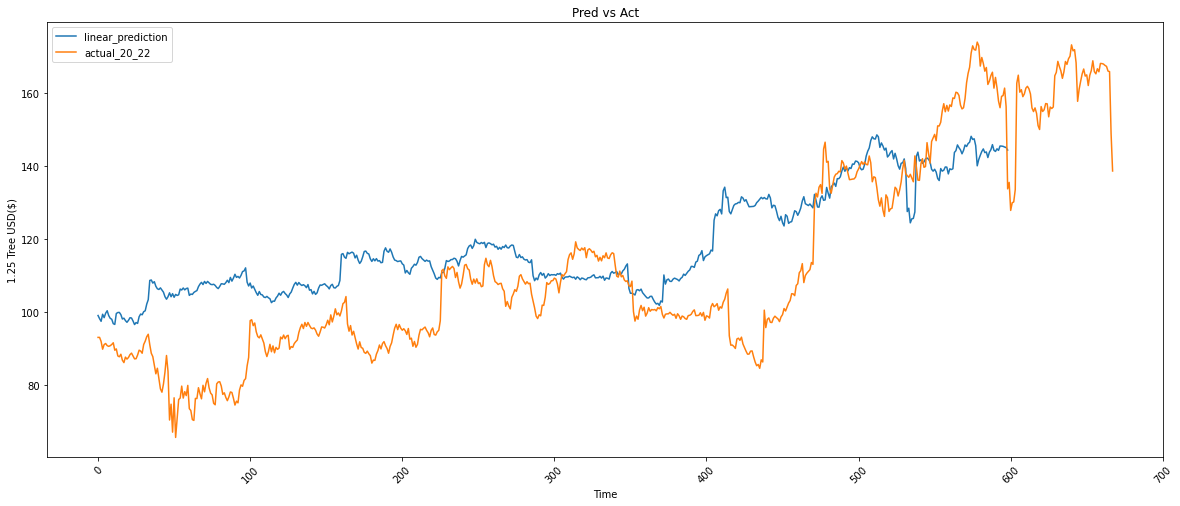

In [33]:
# Visualize the data

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(linear_prediction) # lable='Prediction' , lw=2, alpha=.7)
plt.plot(actual_20_22) #  , lable='Actual') # , lw=2, alpha=.7)
plt.title('Pred vs Act')
plt.xlabel('Time')
plt.ylabel('1.25 Tree USD($)')
plt.legend(['linear_prediction', 'actual_20_22'])
plt.xticks(rotation=45)
plt.show()